In [1]:
import numpy as np
import os

# Background

The overlap matrix is:

$$S_{\mu \nu} =  \int d\vec{r}_{1} \phi_{\mu}(1)^{*}\phi_{\nu}(1)$$

- $\phi_{\mu}$ are basis functions (defined in basis set)


The unknown molecular orbitals $\psi_{i}$ are expanded as a linear expansion of the $K$ known basis functions $\{ \phi_{i} | i=1,2,..., K \}$:

$$ \psi_{i} =  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$$


$C$ is a $K \times K$ matrix of expansion coefficients $C_{\mu i}$. The columns of $C$ describe the molecular orbitals!


We can find the total number of electrons $N$ in the system by:

$$ N =  2 \sum_{a}^{N/2}\int d\vec{r}  \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg) =  2 \sum_{a}^{N/2} 1$$

- integral gives probablity of finding electron $a$ over all space (must be 1)
- summing over all electrons will give the total number of electrons

The charge density has the following definition:

$$\rho(\vec{r}) = 2 \sum_{a}^{N/2} \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg)$$

- re-write using definition of $\psi_{i}=  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$

$$\rho(\vec{r}) = 2 \sum_{a}^{N/2} \Bigg( \bigg[ \sum_{\nu}^{K} C_{\nu a}^{*} \phi_{\nu}(\vec{r})^{*} \bigg] \bigg[ \sum_{\mu}^{K} C_{\mu a}\phi_{\mu}(\vec{r}) \bigg] \Bigg)$$

- move things around

$$\rho(\vec{r}) = \sum_{\nu}^{K} \sum_{\mu}^{K} \Big( 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*} \Big) \phi_{\mu}(\vec{r}) \phi_{\nu}(\vec{r})^{*} $$

- which is 

$$\rho(\vec{r}) = \sum_{\mu, \nu}^{K} P_{\mu \nu} \phi_{\mu}(\vec{r}) \phi_{\nu}(\vec{r})^{*} $$


- $P_{\mu \nu}$ is known as the density matrix and is:

$$P_{\mu \nu} = 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*}$$

Therefore we can also find the total number of electrons in the system by:

$$ N =  2 \sum_{a}^{N/2}\int d\vec{r}  \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg) =  \sum_{\nu}^{K} \sum_{\mu}^{K} \Big( 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*} \Big) \int d\vec{r} \phi_{\mu}(\vec{r})  \phi_{\nu}(\vec{r})^{*}$$

- This is simply:

$$N =  \sum_{\nu}^{K} \sum_{\mu}^{K} P_{\mu \nu} S_{\nu \mu}= \sum_{\mu}^{K} PS_{\mu \mu} = \mathcal{Tr}(PS)$$

- One can interpret $ PS_{\mu \mu}$ in the above equation as the number of electrons associated with $ \phi_{\mu}$
- This is a **Mulliken population analysis**

# Orbital Localization

- When we perform a SCF calculation, one gets an optimized C matrix
    - $C$ is a $K \times K$ matrix of expansion coefficients $C_{\mu i}$
    - The columns of $C$ describe the molecular orbitals!
    - MO i: $ \psi_{i} =  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$
    
    
- These molecular orbitals are usually **delocalized**
    - non-negligible amplitude over the whole system, rather than only around some atom(s) or bond(s)

- But we know in QM that a given basis choice is NOT unique


- We can therefore perform a unitary rotation on molecular orbitals

$$ \psi_{i} U_{rot} =  \Big( \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu} \Big) U_{rot} = \psi_{i}^{new}$$
    
    
The idea is to use a rotation such that the resulting orbitals $\psi_{i}^{new}$ are as spatially localized as possible. 


The Pipek-Mezey (PM) [localization](https://notendur.hi.is/hj/papers/paperPipekmezey8.pdf) **maximizes the population charges on the atoms**:

$$ f (U_{rot}) = \sum_{A}^{N_{atoms}} \Bigg( Z_{A} -  \sum_{\mu \text{ on atom } A} PS_{\mu \mu} \Bigg)$$

### Method 1
- Given optimized $C$ coefficient matrix
    - which has been rotated to localize orbitals
    - (used to build localized density matrix)


- **Look through basis functions $\phi_{\mu}$ of the ACTIVE atoms**

    
- check the mulliken charge // mulliken population of the orbital
    - if above a certain threshold associate it to active system
    - otherwise put in the environment
 


To choose the active and enviroment subsystems we do the following:

1. Given a localized molecular orbs (localized C matrix), we take the absolute mag squared of the coefficients of the active part for a given localized orb and divide by the absolute mag squared of all the coefficents of a that orb... THis will give a value of how much the active system contributes to that orb.

2. Mathematically, for orbital $j$ 
    - remember MO orbs given by columns of C matrix
    - In equation below C matrix is the LOCALIZED form!


$$ \text{threshold} =  \frac{\sum_{\mu\in \text{active AO}}^{K} |C_{\mu j}|^{2}}{\sum_{\mu =1}^{K} |C_{\mu j}|^{2}}$$

## METHOD 2 - SPADE

    

Subsytem Projected Atomic orbital DEcomposition (SPADE) begins by orthogonalising the occupied MOs

$$ \bar{C}_{occ} = S^{-1/2}C_{occ}$$

We project these onto the active atomic orbitals (erasing the contribution from the environment AOs to the MO matrix).

$$ \bar{C}_{occ}^A = P_A\bar{C}_{occ}$$

A singlular value decomposition of these is then taken

$$ \bar{C}_{occ}^A = U \Sigma V^{T}$$

The singular values $\{\sigma\}$ given as the diagonal elements of $\Sigma$, are then used to define the subsytem decomposition by locating the maximum change in singluar value

$$ m = max_{i} \bigg(\sigma_{i} - \sigma_{i+1} \bigg)$$

The occupied MOs are then rotated into the SPADE basis using the right singular vectors of the SVD

$$ \bar{C}_{occ}^{SPADE} = \bar{C}_{occ} V_{m}$$

The SPADE basis is then used to define the active and environment subsystems, taking the first m orbitals as the active subsystem and the remaining as the environment.

Let's start by building a molucule and SCF object.

In [2]:
from pathlib import Path

water_filepath = Path("molecular_structures/acetonitrile.xyz").absolute()
print(water_filepath)

basis = "STO-3G"
charge = 0
xc_functional = "b3lyp"
convergence = 1e-6
pyscf_print_level = 1
max_ram_memory = 4_000
n_active_atoms = 2
occ_cutoff = 0.95
virt_cutoff = 0.95
run_virtual_localization = False

/home/mwilliams/Code/Nbed/docs/notebooks/molecular_structures/acetonitrile.xyz


In [3]:
from pyscf import gto, scf

full_mol = gto.Mole(
    atom=str(water_filepath),
    basis=basis,
    charge=charge,
).build()

global_ks = scf.RKS(full_mol)
global_ks.conv_tol = convergence
global_ks.xc = xc_functional
global_ks.max_memory = max_ram_memory
global_ks.verbose = pyscf_print_level
global_ks.kernel()

/home/mwilliams/.cache/pypoetry/virtualenvs/nbed-g8dV7HW4-py3.8/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


-131.0653251835816

In [4]:
from scipy import linalg
import numpy as np

# Locate he occupied orbitals
occupancy = global_ks.mo_occ
n_occupied_orbitals = np.count_nonzero(occupancy)
occupied_orbitals = global_ks.mo_coeff[:, :n_occupied_orbitals]

# Project onto the active AOs
# Do this by erasing rows of the C matrix
# that correspond to contributions from the environment
# this only works because we have placed our active atoms at the start of the file.
n_act_aos = global_ks.mol.aoslice_by_atom()[n_active_atoms - 1][-1]

# Orthogonalise the MOs
ao_overlap = global_ks.get_ovlp()

rotated_orbitals = linalg.fractional_matrix_power(ao_overlap, 0.5) @ occupied_orbitals

# Take the SVD of the rotated and projected orbitals
_, sigma, right_vectors = linalg.svd(rotated_orbitals[:n_act_aos, :])


# Prevents an error with argmax
if len(sigma) == 1:
    n_act_mos = 1
else:
    value_diffs = sigma[:-1] - sigma[1:]
    n_act_mos = np.argmax(value_diffs) + 1

n_env_mos = n_occupied_orbitals - n_act_mos

# get active and enviro indices
active_MO_inds = np.arange(n_act_mos)
enviro_MO_inds = np.arange(n_act_mos, n_act_mos + n_env_mos)

# Defining active and environment orbitals and density
c_active = occupied_orbitals @ right_vectors.T[:, :n_act_mos]
c_enviro = occupied_orbitals @ right_vectors.T[:, n_act_mos:]
c_loc_occ = occupied_orbitals @ right_vectors.T

In [5]:
enviro_MO_inds

array([ 7,  8,  9, 10])

In [6]:
print(f"{n_act_mos=}")
print(f"{n_env_mos=}")

print(f"{active_MO_inds=}")
print(f"{enviro_MO_inds=}")

print(f"{c_active.shape=}")
print(f"{c_enviro.shape=}")

n_act_mos=7
n_env_mos=4
active_MO_inds=array([0, 1, 2, 3, 4, 5, 6])
enviro_MO_inds=array([ 7,  8,  9, 10])
c_active.shape=(18, 7)
c_enviro.shape=(18, 4)


### Virtual Orbital Localization via Concentric Localization

[1] D. Claudino and N. J. Mayhall, "Simple and Efficient Truncation of Virtual Spaces in Embedded Wave Functions via Concentric Localization", Journal of Chemical Theory and Computation, vol. 15, no. 11, pp. 6085-6096, Nov. 2019, doi: 10.1021/ACS.JCTC.9B00682.

Concentric localization is an extension of SPADE which allows for virtual orbitals to be localized. 

This procedure is carried out after projection based embedding is complete, as this allows for selection of virtual orbitals which are most suitable for the embedded system. Virtual orbital selection does not impact the projection based embedding procedure, until the calculation of the embedded energy term.

Beginning with the occupied orbitals of the active region, the procedure is carried out iteratively.In the first iteration, the procedure allows for a change of basis from embedding to Concentric Localization. The virtual orbitals which overlap to the greatest extent with the occupied orbitals of the active region are selected. These are then used to define the first shell of the Concentric Localization basis. Further iterations find the overlap of remaining virtual MOs with all previous shells (including occupied MOs), under the action of the fock operator. The virtual MOs which interact with the active region are then used to define the next shell of the Concentric Localization basis.

We begin by projecting the MOs onto the active region.

$$ \bar{C}^A = P_A\bar{C}$$

The first step of the iterative process requires finding the virtual orbitals in the projected basis. Note that these virtual orbitals should not include those which have been projected out of the active space.

$$ C^A_{vir} = S^{-1}_A S_{PB,WB} C_{vir} $$

Where $S_{PB,WB}$ gives the overlap matrix between the projected basis and the `working basis` (the basis set used in the projection procedure with occupied environment orbitals removed).

$$ [S_{PB,WB}]_{i,j} = \langle a_i | u_j \rangle \ \{a_i \in C^A, u_j \in C\}$$

We can then begin to build up a set of localized orbitals iteratively. For the initial step, we find the overlap of the two sets of orbitals and singlular value decompose this.

$$ C^A_{vir} S_{PB,WB} C_{vir} = U \Sigma V^{T}$$

By splitting the $V$ matrix into its span and kernel, we can define two sets of orbitals for the $1st$ shell.

Let $T: V \to W$ we a linear transformation, then the image and kernel of $T$ are defined as

$$ im\ T = T(V) = \{T(v) | v \in V\}$$
$$ ker\ T = \{v \in V | T(v) = 0\}$$

The span and kernel can be found by taking the singular value decomposition of $T = L\Sigma R$.

$$ C_{span} = \{r_i \in R | \Sigma_i \neq 0\}$$
$$ C_{ker} = \{r_i \in R | \Sigma_i = 0\}$$

Finally, we can define the two sets of orbitals for the $1st$ shell.

$$ C_0 = C_{vir} V_{span}$$
$$ C_{0,k} = C_{vir} V_{ker}$$

Subesquent iterations are found using the overlap of these two sets of orbitals under the action of the Fock operator $F$.

$$ C_n^{\dagger} F C_{n,k} = U_n \Sigma_n V_n^{T}$$

$$ C_{n+1} = C_{n,k} V_{n,span}$$
$$ C_{n+1,k} = C_{n,k} V_{n,ker}$$

Note the code associated with the original paper `PsiEmbed` defines the span matrix slighly differently.
$$ C_{n+1} = \{C_0|...|C_{n-1}|C_{n,k} V_{n,span}\}$$

(From experience it seems that this choice ensures all orbitals will be included.)

Ultimately, the active space is constructed from the occupied orbitals of the active region and the first $n$ shells.

$$ C_{active\ space} \to \{C_{act, occ}|C_0| C_1| \dots| C_{n}\}

# NOTE

This section will be added at the end of the driver method. So to work it out we'll run the driver first.

In [3]:
from pathlib import Path

mol_filepath = Path("molecular_structures/ethanamine.xyz").absolute()
print(mol_filepath)

/home/mwilliams/Code/Nbed/docs/notebooks/molecular_structures/ethanamine.xyz


In [53]:
from nbed.driver import NbedDriver

driver = NbedDriver(
    geometry=str(mol_filepath),
    n_active_atoms=3,
    basis="STO-3G",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    convergence=1e-6,
    savefile=None,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    run_ccsd_emb=None,
    run_fci_emb=None,
    run_virtual_localization=False,
    max_ram_memory=4_000,
    pyscf_print_level=1,
    unit="angstrom",
    occupied_threshold=0.95,
    virtual_threshold=0.95,
    max_hf_cycles=100,
    max_dft_cycles=100,
    force_unrestricted=False,
)

In [211]:
from pyscf.cc import CCSD

e_ccsd = CCSD(driver.embedded_scf.mo_coeff[:, :-2]).run()
driver_ccsd = e_ccsd.e_tot
print(driver_ccsd)

AssertionError: 

In [54]:
# First lets define how many total orbitals we want to have
max_orbs = 15
max_shells = 4

Create a molecule object for the active region using an arbitrary basis.

In [55]:
projected_mol = gto.mole.Mole()
projected_mol.atom = driver.embedded_scf.mol.atom
projected_mol.basis = driver.embedded_scf.mol.basis  # can be anything
projected_mf = scf.RKS(projected_mol)
n_act_proj_aos = projected_mol.aoslice_by_atom()[n_active_atoms - 1][-1]
print(n_act_proj_aos)

7


Initialize <pyscf.gto.mole.Mole object at 0x7fa520515190> in RKS object of <class 'pyscf.dft.rks.RKS'>


In [56]:
projected_overlap = projected_mf.get_ovlp(driver.embedded_scf.mol)[
    :n_act_proj_aos, :n_act_proj_aos
]
overlap_two_basis = gto.intor_cross(
    "int1e_ovlp_sph", driver.embedded_scf.mol, projected_mol
)[:n_act_proj_aos, :]
# for effective virtuals it seems they have occ_env_aos shifted by this point
# print(projected_overlap.shape)
# print(overlap_two_basis.shape)

print(driver.embedded_scf.mo_coeff.shape)
occupancy = driver.embedded_scf.mo_occ
virtual_mos = np.where(occupancy == 0)[0]
print(f"{virtual_mos=}")
effective_virt = driver.embedded_scf.mo_coeff[:, virtual_mos]
print(f"{effective_virt.shape=}")

left = np.linalg.inv(projected_overlap) @ overlap_two_basis @ effective_virt

_, sigma, right_vectors = np.linalg.svd(left.T @ overlap_two_basis @ effective_virt)

# We'll iteratively build up the total C matrix
active_mos = np.where(occupancy > 0)[0]
c_total = driver.embedded_scf.mo_coeff[:, active_mos]
print(f"Using active MOs for CL: {active_mos}")

shell_size = np.sum(sigma[:n_act_proj_aos] >= 1e-15)
print(f"Singular values: {sigma}")
print(f"{shell_size=}")

v_span = right_vectors.T[:, :shell_size]  # 0 but instability
v_ker = right_vectors.T[:, shell_size:]
print(f"{v_span.shape=}")


c_span = effective_virt @ v_span
c_iker = effective_virt @ v_ker

c_total = np.hstack((c_total, c_span))

fock_operator = driver.embedded_scf.get_fock()
# why use the overlap for the first shell and then the fock for the rest?

ishell = 1
while ishell <= max_shells:
    ishell += 1

    print("Beginning Concentric Localization Iteration")
    print(f"{c_ispan.shape=}, {fock_operator.shape=}, {c_iker.shape=}")
    _, sigma, right_vectors = linalg.svd(c_total.T @ fock_operator @ c_iker)
    print(f"Singular values: {sigma}")
    print(f"{right_vectors.shape=}")

    shell_size = np.sum(sigma[:n_act_proj_aos] >= 1e-15)
    print(f"{shell_size=}")

    v_span = right_vectors.T[:, :shell_size]  # 0 but instability
    v_ker = right_vectors.T[:, shell_size:]

    print(f"{v_span.shape=}")

    # c_span = np.hstack((c_span, c_iker @ v_span))
    c_total = np.hstack((c_total, c_iker @ v_span))

    print(f"{c_total.shape=}")
    if c_total.shape[1] > max_orbs:
        print(f"Exceeded max orbs, cutting to {max_orbs} MOs.")
        c_total = c_total[:, :max_orbs]
        break

    elif c_total.shape[1] == max_orbs:
        print("Reached maximum number of MOs. Ending CL.")
        break

    elif c_total.shape[1] < max_orbs:
        print("Not reached max orbs, continuing CL.")

    dim_ker = v_ker.shape[1]
    print(f"{dim_ker=}")

    if dim_ker > 0:
        c_iker = c_iker @ v_ker
    else:
        # This means that all virtual orbitals have been included.
        print("No kernel, ending CL.")
        break

(22, 14)
virtual_mos=array([ 5,  6,  7,  8,  9, 10, 11, 12, 13])
effective_virt.shape=(22, 9)
Using active MOs for CL: [0 1 2 3 4]
Singular values: [9.92348797e-01 9.91884630e-01 1.81548775e-01 4.62486460e-03
 1.06215828e-03 8.66925163e-06 6.28793294e-08 4.49373075e-17
 2.34367569e-17]
shell_size=7
v_span.shape=(9, 7)
Beginning Concentric Localization Iteration
c_ispan.shape=(2, 22, 7), fock_operator.shape=(22, 22), c_iker.shape=(22, 2)
Singular values: [0.05158684 0.05024977]
right_vectors.shape=(2, 2)
shell_size=2
v_span.shape=(2, 2)
c_total.shape=(22, 14)
Not reached max orbs, continuing CL.
dim_ker=0
No kernel, ending CL.


The final step of CL is to Canonicalize the orbitals - This removes degeneracies which may result in instability of SCF procedures.

We don't actually need to worry about this as we aren't using SCF methods, but beware that it could be relevant.

Open Shells

In [60]:
from nbed.driver import NbedDriver
from pathlib import Path
from pyscf import gto, scf
import numpy as np
from numpy import linalg


mol_filepath = Path("molecular_structures/ethanamine.xyz").absolute()
print(mol_filepath)

n_active_atoms = 3

driver = NbedDriver(
    geometry=str(mol_filepath),
    n_active_atoms=n_active_atoms,
    basis="STO-3G",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    convergence=1e-6,
    savefile=None,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    run_ccsd_emb=None,
    run_fci_emb=None,
    run_virtual_localization=False,
    max_ram_memory=4_000,
    pyscf_print_level=1,
    unit="angstrom",
    occupied_threshold=0.95,
    virtual_threshold=0.95,
    max_hf_cycles=100,
    max_dft_cycles=100,
    force_unrestricted=False,
)

# First lets define how many total orbitals we want to have
max_orbs = 15
max_shells = 4

projected_mol = gto.mole.Mole()
projected_mol.atom = driver.embedded_scf.mol.atom
projected_mol.basis = driver.embedded_scf.mol.basis  # can be anything
projected_mf = scf.RKS(projected_mol)
n_act_proj_aos = projected_mol.aoslice_by_atom()[n_active_atoms - 1][-1]
print(n_act_proj_aos)

/home/mwilliams/Code/Nbed/docs/notebooks/molecular_structures/ethanamine.xyz
7


Initialize <pyscf.gto.mole.Mole object at 0x7fa4b57838e0> in RKS object of <class 'pyscf.dft.rks.RKS'>


In [61]:
projected_overlap = projected_mf.get_ovlp(driver.embedded_scf.mol)[
    :n_act_proj_aos, :n_act_proj_aos
]
overlap_two_basis = gto.intor_cross(
    "int1e_ovlp_sph", driver.embedded_scf.mol, projected_mol
)[:n_act_proj_aos, :]
# for effective virtuals it seems they have occ_env_aos shifted by this point

print(driver.embedded_scf.mo_coeff.shape)
if driver._restricted_scf:
    occ = driver.embedded_scf.mo_occ
    effective_virt = driver.embedded_scf.mo_coeff[:, occ == 0]
else:
    occ = np.array([driver.embedded_scf.mo_occ[0], driver.embedded_scf.mo_occ[1]])
    effective_virt = np.array(
        [driver.embedded_scf.mo_coeff[i][:, occ[i] == 0] for i in [0, 1]]
    )

left = np.linalg.inv(projected_overlap) @ overlap_two_basis @ effective_virt
_, sigma, right_vectors = np.linalg.svd(
    np.swapaxes(left, -1, -2) @ overlap_two_basis @ effective_virt
)

print(f"{driver.embedded_scf.mo_coeff.shape=}")
print(f"{occ.shape=}")
# We'll iteratively build up the total C matrix
if driver._restricted_scf:
    c_total = driver.embedded_scf.mo_coeff[:, occ > 0]
else:
    sigma = np.min(sigma, axis=0)
    c_total = np.array(
        [
            driver.embedded_scf.mo_coeff[0][:, occ[0] > 0],
            driver.embedded_scf.mo_coeff[1][:, occ[1] > 0],
        ]
    )

shell_size = np.sum(sigma[:n_act_proj_aos] >= 1e-15)
print(f"Singular values: {sigma}")
print(f"{shell_size=}")

right_vectors = np.swapaxes(right_vectors, -1, -2)
v_span, v_ker = np.split(right_vectors, [shell_size], axis=-1)  # 0 but instability

print(f"{v_span.shape=}")
print(f"{v_ker.shape=}")
print(f"{c_span.shape=}")
print(f"{c_total.shape=}")

c_ispan = effective_virt @ v_span
c_iker = effective_virt @ v_ker

c_total = np.concatenate((c_total, c_ispan), axis=-1)

fock_operator = driver.embedded_scf.get_fock()
# why use the overlap for the first shell and then the fock for the rest?

ishell = 1
while ishell <= max_shells:
    ishell += 1

    print("Beginning Concentric Localization Iteration")
    print(f"{c_ispan.shape=}, {fock_operator.shape=}, {c_iker.shape=}")
    _, sigma, right_vectors = linalg.svd(
        np.swapaxes(c_total, -1, -2) @ fock_operator @ c_iker
    )
    if not driver._restricted_scf:
        sigma = np.min(sigma, axis=0)

    print(f"Singular values: {sigma}")
    print(f"{right_vectors.shape=}")

    shell_size = np.sum(sigma[:n_act_proj_aos] >= 1e-15)
    print(f"{shell_size=}")

    right_vectors = np.swapaxes(right_vectors, -1, -2)
    v_span, v_ker = np.split(right_vectors, [shell_size], axis=-1)  # 0 but instability

    print(f"{v_span.shape=}")

    c_total = np.concatenate((c_total, c_iker @ v_span), axis=-1)

    print(f"{c_total.shape=}")
    if c_total.shape[-1] > max_orbs:
        print(f"Exceeded max orbs, cutting to {max_orbs} MOs.")
        break

    elif c_total.shape[-1] == max_orbs:
        print("Reached maximum number of MOs. Ending CL.")
        break

    elif c_total.shape[-1] < max_orbs:
        print("Not reached max orbs, continuing CL.")

    dim_ker = v_ker.shape[-1]
    print(f"{dim_ker=}")

    if dim_ker > 0:
        c_iker = c_iker @ v_ker
    else:
        # This means that all virtual orbitals have been included.
        print("No kernel, ending CL.")
        break

(22, 14)
driver.embedded_scf.mo_coeff.shape=(22, 14)
occ.shape=(14,)
Singular values: [9.92348797e-01 9.91884630e-01 1.81548775e-01 4.62486459e-03
 1.06215828e-03 8.66925198e-06 6.28793285e-08 8.54572494e-17
 3.90151124e-17]
shell_size=7
v_span.shape=(9, 7)
v_ker.shape=(9, 2)
c_span.shape=(22, 7)
c_total.shape=(22, 5)
Beginning Concentric Localization Iteration
c_ispan.shape=(22, 7), fock_operator.shape=(22, 22), c_iker.shape=(22, 2)
Singular values: [0.05158684 0.05024977]
right_vectors.shape=(2, 2)
shell_size=2
v_span.shape=(2, 2)
c_total.shape=(22, 14)
Not reached max orbs, continuing CL.
dim_ker=0
No kernel, ending CL.


### Relative accuracy of the embedding energy

- Find the full system reference
- Perform localization
- Compare energy errors with increasing MOs 

First we run everything without CL

In [32]:
import numpy as np
from nbed.driver import NbedDriver
from pyscf.cc import CCSD
from pathlib import Path

mol_filepath = Path("molecular_structures/ethanamine.xyz").absolute()
print(mol_filepath)

unloc_driver = NbedDriver(
    geometry=str(mol_filepath),
    n_active_atoms=3,
    basis="6-31g",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    convergence=1e-6,
    savefile=None,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    run_ccsd_emb=None,
    run_fci_emb=None,
    run_virtual_localization=False,
    max_ram_memory=4_000,
    pyscf_print_level=1,
    unit="angstrom",
    occupied_threshold=0.95,
    virtual_threshold=0.95,
    max_hf_cycles=100,
    max_dft_cycles=100,
    force_unrestricted=False,
)
print(unloc_driver.embedded_scf.mo_coeff.shape)
print(np.where(unloc_driver.embedded_scf.mo_occ > 0)[0])
print(
    unloc_driver.embedded_scf.mo_occ.shape
)  # unloc_driver.embedded_scf.mo_occ = unloc_driver.emmo_occ[:unloc_driver.embedded_scf.mo_coeff.shape[-1]]
unloc_full_cc = CCSD(unloc_driver.embedded_scf).run()
unloc_full_cc = unloc_full_cc.e_tot

from pyscf.cc import CCSD
from copy import deepcopy

partial_scf = unloc_driver.embedded_scf
unloc_energies = []
mos = [i for i in range(5, 34)]
mos = mos[::-1]
for i in mos:
    partial_scf.mo_coeff = partial_scf.mo_coeff[:, :i]
    partial_scf.mo_occ = partial_scf.mo_occ[:i]
    print(f"Running CCSD with {i} MOs.")

    e_ccsd = CCSD(partial_scf).run()
    driver_ccsd = e_ccsd.e_tot
    unloc_energies.append(driver_ccsd - unloc_full_cc)
    print(driver_ccsd - unloc_full_cc)
    print("")

/home/mwilliams/Code/Nbed/docs/notebooks/molecular_structures/ethanamine.xyz
(41, 33)
[0 1 2 3 4]
(33,)
E(CCSD) = 15.3374923277202  E_corr = -0.130205046867858
Running CCSD with 33 MOs.
E(CCSD) = 15.33749232772017  E_corr = -0.130205046867858
-2.842170943040401e-14

Running CCSD with 32 MOs.
E(CCSD) = 15.34445011765843  E_corr = -0.1232472569296271
0.006957789938230263

Running CCSD with 31 MOs.
E(CCSD) = 15.34562425418291  E_corr = -0.1220731204051189
0.008131926462709771

Running CCSD with 30 MOs.
E(CCSD) = 15.3462217472177  E_corr = -0.121475627370344
0.008729419497498725

Running CCSD with 29 MOs.
E(CCSD) = 15.34716349899069  E_corr = -0.1205338755973531
0.00967117127049022

Running CCSD with 28 MOs.
E(CCSD) = 15.37081357253166  E_corr = -0.09688380205638084
0.03332124481146259

Running CCSD with 27 MOs.
E(CCSD) = 15.38998376920076  E_corr = -0.07771360538726968
0.05249144148055862

Running CCSD with 26 MOs.
E(CCSD) = 15.39550891028202  E_corr = -0.07218846430600612
0.0580165825618

Now run it again with CL

In [33]:
from nbed.driver import NbedDriver
from pyscf.cc import CCSD
from pathlib import Path
import numpy as np

mol_filepath = Path("molecular_structures/ethanamine.xyz").absolute()
print(mol_filepath)

driver = NbedDriver(
    geometry=str(mol_filepath),
    n_active_atoms=3,
    basis="6-31g",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    convergence=1e-6,
    savefile=None,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    run_ccsd_emb=None,
    run_fci_emb=None,
    run_virtual_localization=True,
    max_shells=10,
    max_ram_memory=4_000,
    pyscf_print_level=1,
    unit="angstrom",
    occupied_threshold=0.95,
    virtual_threshold=0.95,
    max_hf_cycles=100,
    max_dft_cycles=100,
    force_unrestricted=False,
)
print(driver.embedded_scf.mo_coeff.shape)
print(np.where(driver.embedded_scf.mo_occ > 0)[0])
print(driver.embedded_scf.mo_occ.shape)
# driver.embedded_scf.mo_occ = driver.embedded_scf.mo_occ[:driver.embedded_scf.mo_coeff.shape[-1]]
full_cc = CCSD(driver.embedded_scf).run()
full_cc = full_cc.e_tot

from pyscf.cc import CCSD
from copy import deepcopy

partial_scf = driver.embedded_scf
energies = []
mos = [i for i in range(5, 34)]
mos = mos[::-1]
for i in mos:
    partial_scf.mo_coeff = partial_scf.mo_coeff[:, :i]
    partial_scf.mo_occ = partial_scf.mo_occ[:i]
    print(f"Running CCSD with {i} MOs.")

    e_ccsd = CCSD(partial_scf).run()
    driver_ccsd = e_ccsd.e_tot
    energies.append(driver_ccsd - full_cc)
    print(driver_ccsd - full_cc)
    print("")

/home/mwilliams/Code/Nbed/docs/notebooks/molecular_structures/ethanamine.xyz


Initialize <pyscf.gto.mole.Mole object at 0x7f03615a4730> in RKS object of <class 'pyscf.dft.rks.RKS'>


(41, 33)
[0 1 2 3 4]
(33,)
E(CCSD) = 15.33749238586233  E_corr = -0.1302049890066784
Running CCSD with 33 MOs.
E(CCSD) = 15.33749238586232  E_corr = -0.1302049890066872
-8.881784197001252e-15

Running CCSD with 32 MOs.
E(CCSD) = 15.33751376689264  E_corr = -0.1301836079763672
2.1381030311573568e-05

Running CCSD with 31 MOs.
E(CCSD) = 15.33752743862865  E_corr = -0.1301699362403515
3.505276632687071e-05

Running CCSD with 30 MOs.
E(CCSD) = 15.33753945483357  E_corr = -0.1301579200354307
4.706897124684417e-05

Running CCSD with 29 MOs.
E(CCSD) = 15.3375542187202  E_corr = -0.1301431561488045
6.183285787386694e-05

Running CCSD with 28 MOs.
E(CCSD) = 15.3375630721106  E_corr = -0.1301343027584144
7.068624827866188e-05

Running CCSD with 27 MOs.
E(CCSD) = 15.33757911943008  E_corr = -0.1301182554389271
8.673356775190655e-05

Running CCSD with 26 MOs.
E(CCSD) = 15.33785671491114  E_corr = -0.1298406599578658
0.00036432904881245065

Running CCSD with 25 MOs.
E(CCSD) = 15.33788301096593  E_c

We can see that the total energy between methods is very similar so our CL procedure does not introduce energy errors.

In [7]:
full_cc - unloc_full_cc

5.754625220788512e-08

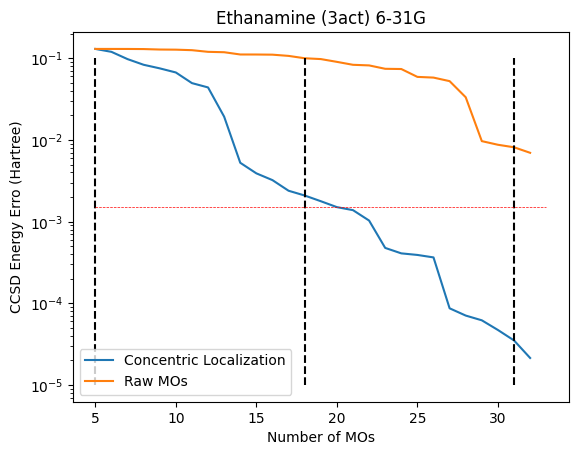

In [36]:
from matplotlib import pyplot as plt

plt.semilogy(np.arange(5, 33), np.abs(energies[::-1][:-1]))
plt.semilogy(np.arange(5, 33), np.abs(unloc_energies[::-1][:-1]))
plt.vlines(5, ymin=1e-5, ymax=1e-1, color="k", linestyle="--")
plt.vlines(18, ymin=1e-5, ymax=1e-1, color="k", linestyle="--")
plt.vlines(31, ymin=1e-5, ymax=1e-1, color="k", linestyle="--")
plt.hlines(1.5e-3, xmin=5, xmax=33, color="red", linestyle="--", linewidth=0.5)

plt.title("Ethanamine (3act) 6-31G")
plt.ylabel("CCSD Energy Error (Hartree)")
plt.xlabel("Number of MOs")
plt.legend(["Concentric Localization", "Raw MOs"])

Black lines show the position of CL shells.

The red line shows the cutoff for chemical accuracy (1.5mHa)

### PySCF methods

In [ ]:
# get xyz file for water

notebook_dir = os.getcwd()
docs_dir = os.path.dirname(notebook_dir)
NBed_dir = os.path.dirname(docs_dir)
Test_dir = os.path.join(NBed_dir, "tests")
mol_dir = os.path.join(Test_dir, "molecules")

water_xyz_path = os.path.join(mol_dir, "water.xyz")

In [ ]:
### inputs
from pyscf import gto, scf

basis = "STO-3G"
charge = 0
spin = 0
full_system_mol = gto.Mole(
    atom=water_xyz_path,
    basis=basis,
    charge=charge,
    spin=spin,
)
full_system_mol.build()

HF_scf = scf.RHF(full_system_mol)
HF_scf.verbose = 1
HF_scf.conv_tol = 1e-6
HF_scf.kernel()
###

In [ ]:
from nbed.localizers import (
    BOYSLocalizer,
    IBOLocalizer,
    Localizer,
    PMLocalizer,
    SPADELocalizer,
)

In [ ]:
localizers = {
    "spade": SPADELocalizer,
    "boys": BOYSLocalizer,
    "ibo": IBOLocalizer,
    "pipek-mezey": PMLocalizer,
}

In [ ]:
n_active_atoms = 2  # (first n rows are active in xyz file)
loc_str = "boys"  # <--- change to perform different localization
threshold = 0.95


## object runs localization when initialized!
loc_system = localizers[loc_str](
    HF_scf,
    n_active_atoms,
)

In [ ]:
print(f"active MO inds: {loc_system.active_MO_inds}")
print(f"enviro MO inds: {loc_system.enviro_MO_inds}")


# orb threshold
if loc_str != "spade":
    print("Localized MO threshold:", loc_system.enviro_selection_condition)
    print(f"indices above {threshold} set active")
    # indices above threshold (usually 95%) set to active

In [ ]:
dm_localised_full_system = 2 * loc_system._c_loc_occ @ loc_system._c_loc_occ.conj().T
dm_active = loc_system.dm_active
dm_enviro = loc_system.dm_enviro

# check act and env density give the full density
print(
    f"does: y_full = y_act + y_env ... {np.allclose(dm_localised_full_system, dm_active + dm_enviro)}"
)


# check number of electrons is still the same after orbitals have been localized (change of basis)
s_ovlp = loc_system._global_ks.get_ovlp()
n_active_electrons = np.trace(dm_active @ s_ovlp)
n_enviro_electrons = np.trace(dm_enviro @ s_ovlp)


# check number of electrons is correct
print(
    f"does: n_elec_full = n_elec_act + n_elec_env ... {np.allclose(HF_scf.mol.nelectron, n_active_electrons+n_enviro_electrons)}"
)

In [ ]:
# active MOs
loc_system.c_active

In [ ]:
# enviro MOs
loc_system.c_enviro

In [ ]:
# full localized C matrix
loc_system.

In [ ]:
# to get active and environment C matrix slice this array using active_MO_inds and enviro_MO_inds

## e.g. for environment
np.allclose(
    loc_system.c_loc_occ_and_virt[:, loc_system.enviro_MO_inds], loc_system.c_enviro
)

See notebook 1 on how to plot these LOCALIZED orbitals

use c_loc_occ_and_virt / c_active / c_enviroment to plot localized orbitals